In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../titanic/train.csv')

In [42]:
mean_age = np.mean(df['Age'].dropna())
median_age = np.median(df['Age'].dropna())
std_age = np.std(df['Age'].dropna())

print(f"Durchschnittsalter: {mean_age:.2f}")
print(f"Median: {median_age:.2f}")
print(f"Standardabweichung: {std_age:.2f}")

Durchschnittsalter: 29.70
Median: 28.00
Standardabweichung: 14.52


In [43]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [44]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# 🧭 Titanic-Datenanalyse: Überlebensraten

In dieser Analyse betrachten wir die Überlebensraten im Titanic-Datensatz nach verschiedenen Merkmalen:

- **Klasse (Pclass)**
- **Geschlecht (Sex)**
- **Einschiffungshafen (Embarked)**
- **Familiengröße (SibSp + Parch)**


In [45]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Überlebensrate nach Klasse:")
print(survival_by_class)

survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\nÜberlebensrate nach Geschlecht:")
print(survival_by_sex)

survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print("\nÜberlebensrate nach Embarked:")
print(survival_by_embarked)

df['FamilySize'] = df['SibSp'] + df['Parch']
survival_by_family = df.groupby('FamilySize')['Survived'].mean()
print("\nÜberlebensrate nach Familiengröße:")
print(survival_by_family)

Überlebensrate nach Klasse:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Überlebensrate nach Geschlecht:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Überlebensrate nach Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Überlebensrate nach Familiengröße:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


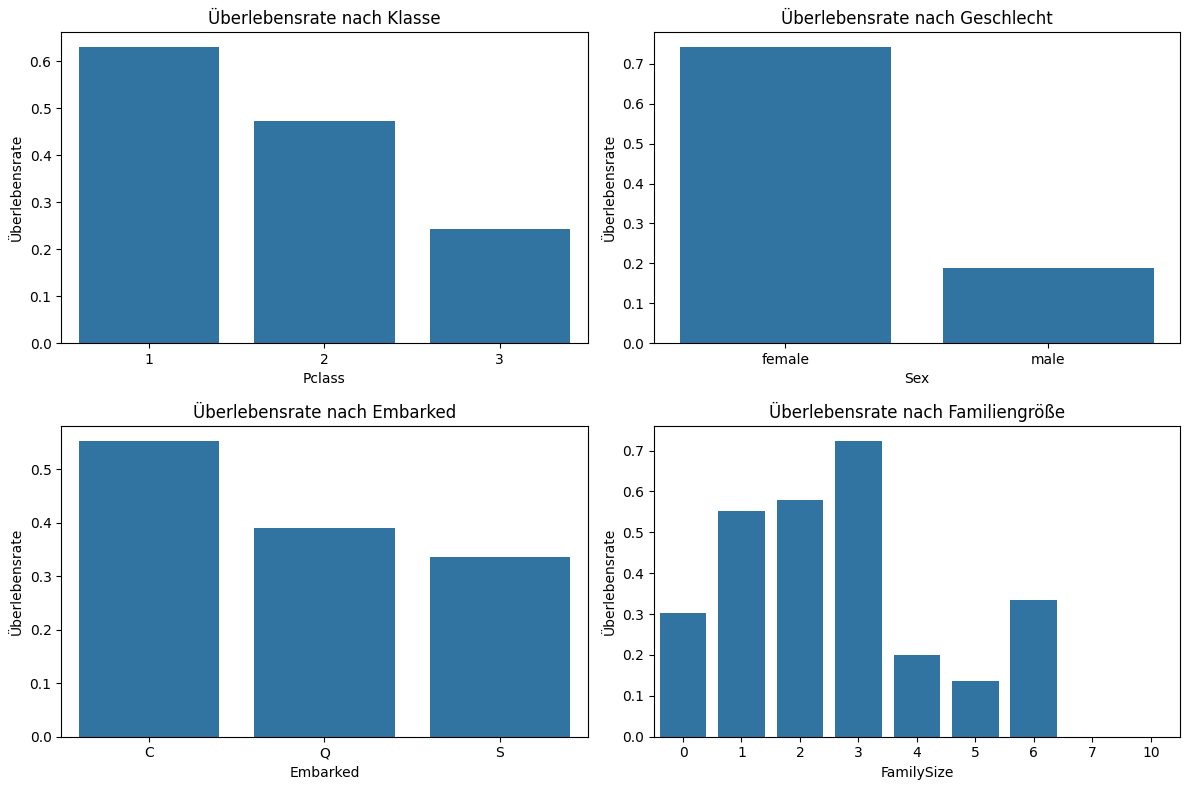

In [46]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Überlebensrate nach Klasse')
plt.ylabel('Überlebensrate')

plt.subplot(2, 2, 2)
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title('Überlebensrate nach Geschlecht')
plt.ylabel('Überlebensrate')

plt.subplot(2, 2, 3)
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values)
plt.title('Überlebensrate nach Embarked')
plt.ylabel('Überlebensrate')

plt.subplot(2, 2, 4)
sns.barplot(x=survival_by_family.index, y=survival_by_family.values)
plt.title('Überlebensrate nach Familiengröße')
plt.ylabel('Überlebensrate')

plt.tight_layout()
plt.show()

Was sind die Ticketpreise nach klasse ? Plot punkte plot? 

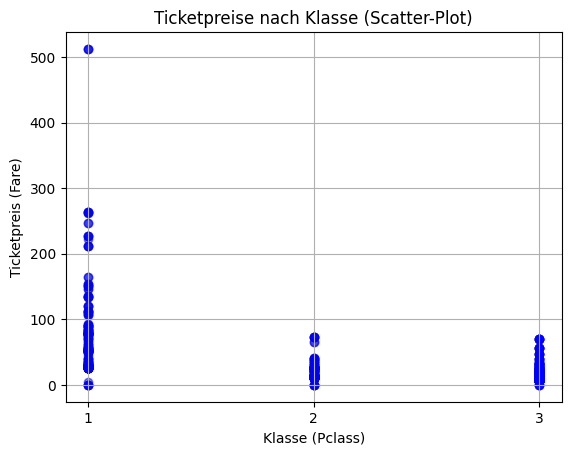

In [48]:
ticket_price_by_class = df.groupby('Pclass')['Fare'].mean()

plt.Figure(figsize=(8, 6))
plt.scatter(df['Pclass'], df['Fare'], alpha=0.5, color='blue')
plt.title('Ticketpreise nach Klasse (Scatter-Plot)')
plt.xlabel('Klasse (Pclass)')
plt.ylabel('Ticketpreis (Fare)')
plt.xticks([1, 2, 3])  # Da Pclass 1
plt.grid(True)
plt.show()

Varianz auch mit familien größe etc., bei allen spalten. Kosten Ticket? 

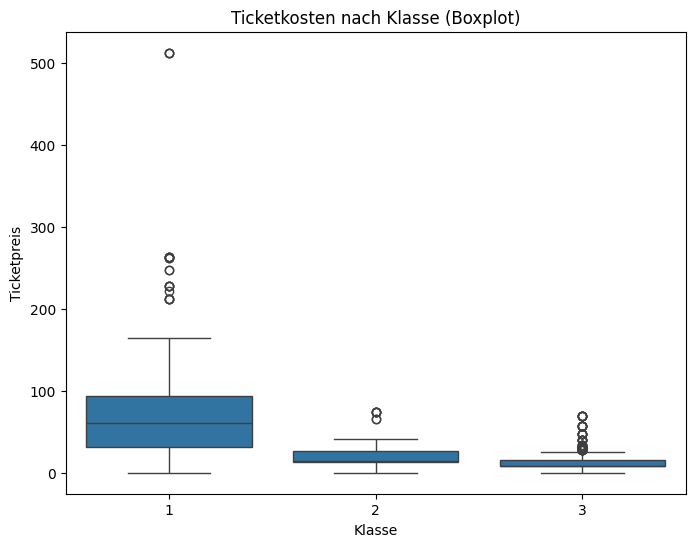

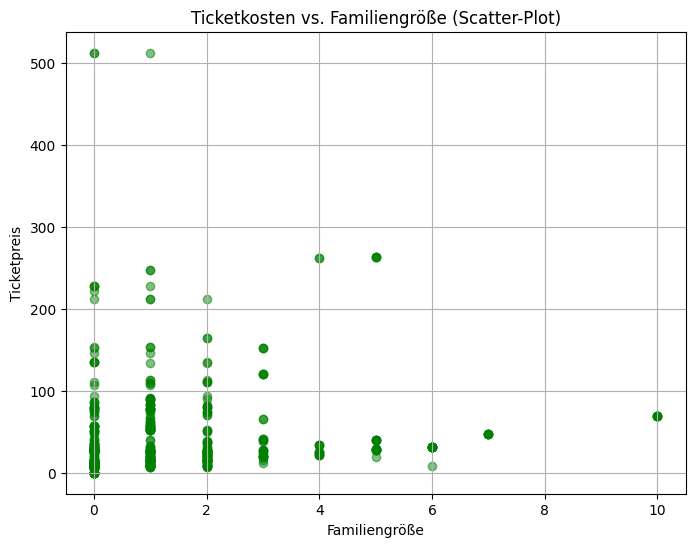

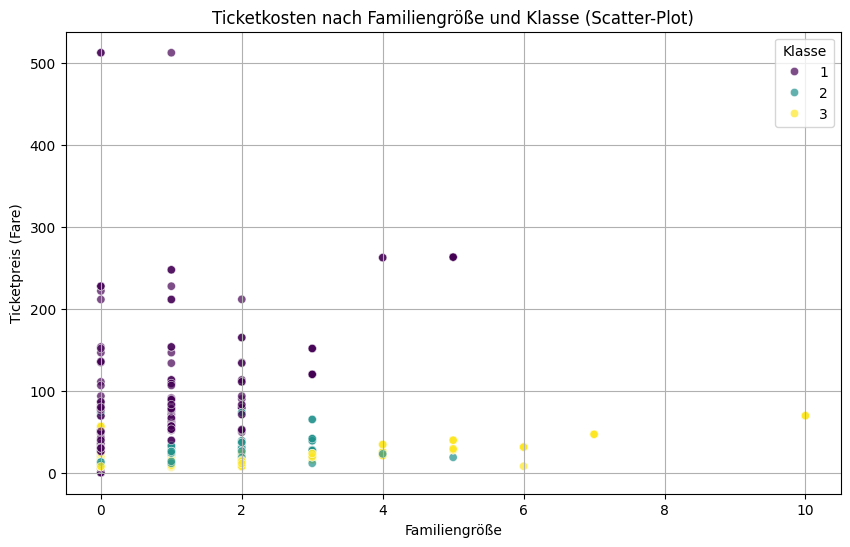

In [50]:
df['FamilySize'] = df['SibSp'] + df['Parch']

variance = df.select_dtypes(include=[np.number]).var()
fare_variance = df['Fare'].var()
family_variance = df.groupby('FamilySize')['Fare'].var()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Ticketkosten nach Klasse (Boxplot)')
plt.xlabel('Klasse')
plt.ylabel('Ticketpreis')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['FamilySize'], df['Fare'], alpha=0.5, color='green')
plt.title('Ticketkosten vs. Familiengröße (Scatter-Plot)')
plt.xlabel('Familiengröße')
plt.ylabel('Ticketpreis')
plt.grid(True)
plt.show()

df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FamilySize', y='Fare', hue='Pclass', data=df, palette='viridis', alpha=0.7)
plt.title('Ticketkosten nach Familiengröße und Klasse (Scatter-Plot)')
plt.xlabel('Familiengröße')
plt.ylabel('Ticketpreis (Fare)')
plt.legend(title='Klasse')
plt.grid(True)
plt.show()


woran liegt das an c mehr leute überlben als in q oder s, und auch bei der famileen größe ? verbniudn mit klassen und überlebensrate von kindern

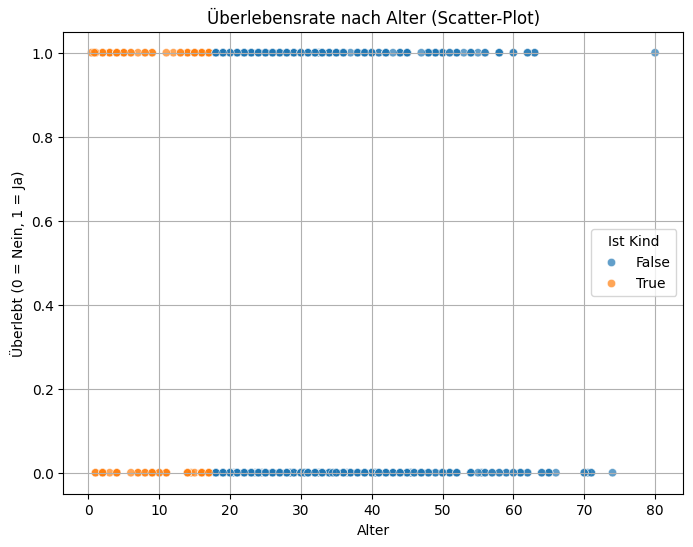

In [53]:
df['IsChild'] = df['Age'] < 18

child_survival = df.groupby('IsChild')['Survived'].mean()
child_survival_by_class = df[df['IsChild']].groupby('Pclass')['Survived'].mean()
child_survival_by_embarked = df[df['IsChild']].groupby('Embarked')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Survived', hue='IsChild', data=df, alpha=0.7)
plt.title('Überlebensrate nach Alter (Scatter-Plot)')
plt.xlabel('Alter')
plt.ylabel('Überlebt (0 = Nein, 1 = Ja)')
plt.legend(title='Ist Kind')
plt.grid(True)
plt.show()